In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import datetime
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob


sns.set_palette('colorblind')

In [38]:
biden = pd.read_csv("biden_tweets.csv")
trump = pd.read_csv("trump_tweets.csv")

In [39]:
biden.head()

,Unnamed: 0,id,full_text,entities,created_at,favourite,retweets,language,geo,in_reply
0,0,1313663334286323714,Please. https://t.co/acHR1Rf8hE,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 02:12:00,90289,14867,en,NaN,NaN
1,1,1313652765319557122,I can’t wait for @KamalaHarris to make history...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 01:30:00,13317,2126,en,NaN,NaN
2,2,1313646473393840128,"Ignore the polls, folks. There’s too much at s...","{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 01:05:00,56278,12104,en,NaN,NaN
3,3,1313641691602202624,Think about what it takes for a Black person t...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 00:46:00,30592,6574,en,NaN,NaN
4,4,1313633890289045504,"Look, folks, I'm going to be honest: we'll try...","{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 00:15:00,13490,3023,en,NaN,NaN


### Get Texts of Each Tweet into a new DataFrame

In [40]:
biden_text = biden['full_text']
trump_text = trump['full_text']

## Get Sentiment of Each Tweet

In [41]:
biden_sent_list_polarity = []
biden_sent_list_subjectivity = []
trump_sent_list_polarity = []
trump_sent_list_subjectivity = []
for i in biden_text:
    tweet = TextBlob(i)
    biden_sent_list_polarity.append(tweet.sentiment.polarity)
    biden_sent_list_subjectivity.append(tweet.sentiment.subjectivity)
for i in trump_text:
    tweet = TextBlob(i)
    trump_sent_list_polarity.append(tweet.sentiment.polarity)
    trump_sent_list_subjectivity.append(tweet.sentiment.subjectivity)

trump_sent = pd.DataFrame({'Polarity': trump_sent_list_polarity,
                          'Subjectivity': trump_sent_list_subjectivity})
biden_sent = pd.DataFrame({'Polarity': biden_sent_list_polarity,
                          'Subjectivity': biden_sent_list_subjectivity})

biden_sent["date"] = pd.to_datetime(biden_tweets["created_at"], format = "%Y-%m-%d %H:%M:%S")
trump_sent["date"] = pd.to_datetime(trump_tweets["created_at"], format = "%Y-%m-%d %H:%M:%S")

plt.figure(figsize = (14 ,14))

<Figure size 1008x1008 with 0 Axes>

<Figure size 1008x1008 with 0 Axes>

## Plots 

(array([ 11.,  16.,  28.,  73., 157., 868., 193., 118.,  54.,  89.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

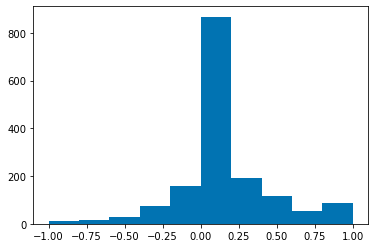

In [42]:
plt.hist(trump_sent['Polarity'])

(array([   4.,    9.,   58.,  146.,  331., 1624.,  547.,  249.,   54.,
          62.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

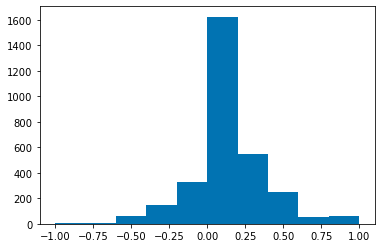

In [7]:
plt.hist(biden_sent['Polarity'])

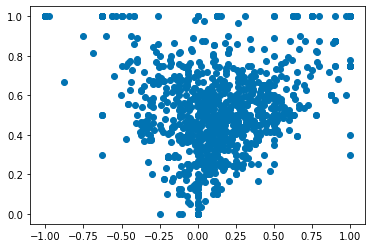

In [8]:
plt.scatter(trump_sent['Polarity'], trump_sent['Subjectivity'])

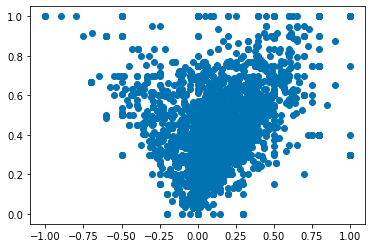

In [9]:
plt.scatter(biden_sent['Polarity'], biden_sent['Subjectivity'])

In [28]:
trump_sent.head()

,Polarity,Subjectivity,date
0,0.0,0.0,2020-10-08 02:49:05
1,0.5,0.5,2020-10-08 02:40:57
2,0.0,0.0,2020-10-08 02:24:56
3,0.0,0.0,2020-10-08 02:23:49
4,0.0,0.0,2020-10-08 02:20:57


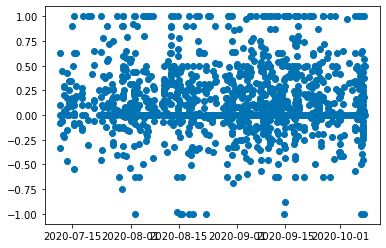

In [35]:
plt.scatter(trump_sent['date'],trump_sent['Polarity'])

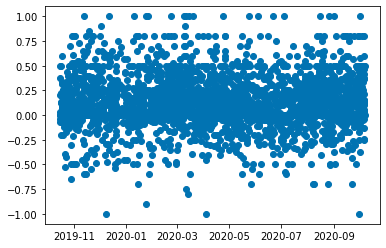

In [37]:
plt.scatter(biden_sent['date'],biden_sent['Polarity'])
plt.show()